# **Summary**

Coronary heart disease (CHD) occurs when there is a large build-up of plaque (cholesterol) in the coronary arteries of the heart. CHD affects an estimated 7% of the US population over 20 years, with 16.3 million Americans afflicted. The narrowing of essential arteries forces the heart epicardium (muscles) to work harder, deteriorating it over time and increasing the risk of heart attack. Considering this disease develops in middle to older age, a lot of its causes can be traced back to lifestyle and important vitals. To better understand the risk factors of CHD and their predictability of developing it, a large database of 3180 patients from the Framingham Heart Study with biographical details, vital signs, and 10-year CHD outcome was analyzed using several data science based approaches.

The k-Means Clustering was used to explore and identify potential predictors of CHD by grouping similar data points based on lifestyle and vital health indicators. In contrast, the kNN model emphasized handling missing data and feature scaling to refine its predictions, achieving an R² score of 0.0601, indicating it captured only a small portion of the variance in CHD risk. The Decision Tree model targeted variables highly correlated with CHD, achieving an accuracy of 83% and an R² of 0.83, but showed a puzzling ROC AUC of about 50%, suggesting further investigation is needed to understand the disparity between the different metrics. Linear Regression was utilized to analyze the influence of various health metrics on CHD risk, revealing that variables such as age and systolic blood pressure were significant predictors, although the model only explained up to 9.78% of the variance after data transformations.

Overall, while each model provided unique insights, they also highlighted the complexity of predicting CHD risk based on available variables. The results suggested that, despite employing multiple modeling techniques, significant variance remains unexplained, indicating the potential need for more sophisticated models or additional predictors to enhance predictive accuracy. This study underscores the challenges in modeling health outcomes and the necessity of continuous refinement and testing of predictive models in medical research.



# **Data**

##kMeans Clustering

The preliminary approach sought to gain a better understanding of the dataset from the Framingham Heart Study (FHS) and the variables at play. Two kMeans clustering algorithms were run: one for lifestyle-related variables (i.e., chronic diseases) and the other for vitals. Given the unsupervised nature of clustering, the main goal here was to play around with the variables and identify predictors of CHD. Thus, three variables were chosen for each clustering run based on past clinical findings and trial-and-error feature selection.

For the lifestyle kMC, diabetes, cigsPerDay, and BMI were used. Diabetes causes reduced glucose uptake, leading to a whole host of other complications, making it a common comorbidity for other chronic ailments like CHD. Moreover, cigarette use has been attributed to a wide range of cardiovascular and respiratory diseases. Lastly, BMI reveals information regarding obesity which is also correlated with CHD according to the literature.

For the vitals kMC, total cholesterol, systolic blood pressure, heart rate, and blood glucose level. As previously discussed, plaque in the coronary arteries is from a buildup of cholesterol, so total cholesterol shows to be noteworthy. In previous findings of the Framingham Study, they found systolic blood pressure to be a far more valuable predictor of CHD as opposed to diastolic hence why only systolic is considered in this model. Heart rate may demonstrate how hard the heart works to pump blood to the body due to narrowed arteries. Lastly, blood glucose level is an indicator of diabetes which corresponds to the lifestyle approach to clustering.

Sex, age, and education level were not used as other variables, like cigarette smoking and diabetes, were evenly distributed across these categories, making them relatively weak predictors. Additionally, across all variables, the use of binary variables was minimized to mitigate forced fitting to two clusters.

All the variables that were used were max-min normalized, and missing data was removed. Considering clustering is unsupervised, removing missing data was not a problem.




In [29]:
df = pd.read_csv('/content/drive/MyDrive/Spring 2024/DS 3001/fhs_train.csv')
df

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1411,1,36,4.0,0,0.0,0.0,0,0,0,234.0,133.0,88.0,26.78,58,100.0,0
3176,262,1,47,1.0,1,20.0,0.0,0,0,0,284.0,137.0,91.0,27.33,73,61.0,0
3177,1459,1,52,2.0,0,0.0,0.0,0,0,0,310.0,135.0,89.0,29.51,64,74.0,1
3178,733,0,48,1.0,1,5.0,0.0,0,0,0,296.0,117.0,73.0,24.59,70,78.0,0


**kMC 1: Lifestyle**

In [30]:
# lifestyle: clean & normalize variables

df1 = df.loc[:,['diabetes','cigsPerDay','BMI','TenYearCHD']] # select variables

df1 = df1.dropna() # drop missing values

def maxmin(x): # normalization function
  u = (x-min(x))/(max(x)-min(x))
  return u

chd = df['TenYearCHD'] # the output to fit clustering onto
kmc1 = df1.loc[:,['diabetes','cigsPerDay','BMI']] # cluster variables

kmc1 = kmc1.apply(maxmin) # normalize

kmc1

,diabetes,cigsPerDay,BMI
0,0.0,0.000000,0.346825
1,0.0,0.214286,0.160446
2,0.0,0.000000,0.245759
3,0.0,0.614286,0.202618
4,0.0,0.000000,0.138633
...,...,...,...
3175,0.0,0.000000,0.272419
3176,0.0,0.285714,0.285749
3177,0.0,0.000000,0.338585
3178,0.0,0.071429,0.219341


**kMC 2: Vitals**

In [32]:
# vitals: clean & normalize variables

df2 = df.loc[:,['totChol','sysBP','heartRate','glucose','TenYearCHD']]

df2 = df2.dropna()

def maxmin(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

chd = df2['TenYearCHD']
kmc2 = df2.loc[:,['totChol','sysBP','heartRate','glucose']]

kmc2 = kmc2.apply(maxmin)

kmc2

,totChol,sysBP,heartRate,glucose
0,0.191851,0.281324,0.322917,0.132768
1,0.156197,0.182033,0.427083,0.104520
3,0.106961,0.219858,0.687500,0.098870
4,0.161290,0.191489,0.322917,0.096045
6,0.220713,0.416076,0.489583,0.180791
...,...,...,...,...
3174,0.361630,0.385343,0.375000,0.166667
3175,0.215620,0.234043,0.145833,0.169492
3176,0.300509,0.252955,0.302083,0.059322
3177,0.344652,0.243499,0.208333,0.096045


##K-Nearest Neighbors

The dataset provided is part of a study aimed at predicting the 10-year risk of coronary heart disease (CHD) using a range of health-related variables. This data originates from a subset of the Framingham Heart Study, which includes key variables such as sex, age, education, smoking habits, cholesterol levels, blood pressure, body mass index (BMI), heart rate, and glucose levels. Each of these variables is crucial in understanding and predicting the likelihood of CHD, and were taken into account in the k-nearest neighbors (kNN) algorithm.

For the KNN algorithm, one of the primary challenges encountered was managing missing data across several variables. For instance, data points for education, cigarettes per day, BPMeds (blood pressure medication), total cholesterol, BMI, and glucose were missing for some individuals. Addressing these missing values is crucial because inaccurate imputation could lead to misleading model predictions. The approach taken was to use the median for continuous variables to mitigate the impact of outliers and mode for categorical variables to ensure the most common category influences the imputation.


In [ ]:
# path of the data
train_data_path = "./data/fhs_train.csv"
test_data_path = "./data/fhs_test.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3180 non-null   int64  
 1   sex              3180 non-null   int64  
 2   age              3180 non-null   int64  
 3   education        3095 non-null   float64
 4   currentSmoker    3180 non-null   int64  
 5   cigsPerDay       3156 non-null   float64
 6   BPMeds           3143 non-null   float64
 7   prevalentStroke  3180 non-null   int64  
 8   prevalentHyp     3180 non-null   int64  
 9   diabetes         3180 non-null   int64  
 10  totChol          3141 non-null   float64
 11  sysBP            3180 non-null   float64
 12  diaBP            3180 non-null   float64
 13  BMI              3165 non-null   float64
 14  heartRate        3180 non-null   int64  
 15  glucose          2895 non-null   float64
 16  TenYearCHD       3180 non-null   int64  
dtypes: float64(8),

In [ ]:
train_data.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [ ]:
# get the shapes of the dataset
print("Shape of training data:", train_data.shape)
print("Shape of Test Data:", test_data.shape)

Shape of training data: (3180, 17)
Shape of Test Data: (1060, 17)


##Decision Trees

The second approach used decision tree regressors in order to predict CHD. The first step was creating a correlation matrix to see which values seem to correlate the most with the `TenYearCHD` variable. The correlation matrix seems to indicate that `age`, `sysBP`,`prevalentHyp`, `diaBP`, `glucose`, and `diabetes` have the correlations 0.23, 0.21, 0.16, 0.13, 0.13, and 0.11 respectively all of which are above .09. It seems like only `glucose` has null values. Since we are assuming that the samples were drawn from a similar distribution, it may make sense to impute the mean for all the `null` values.

In [ ]:
# provide two lists; one for features of interest and the other for target
variables_of_interest = ["age", "sysBP", "prevalentHyp", "diaBP", "glucose", "diabetes"]
target_variable = ["TenYearCHD"]

In [ ]:
# correlation matrix
corr_matrix = train_data.corr()
print(corr_matrix['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225568
sysBP              0.205898
prevalentHyp       0.163910
diaBP              0.133094
glucose            0.126485
diabetes           0.105644
totChol            0.099704
sex                0.097138
BPMeds             0.088135
BMI                0.072830
prevalentStroke    0.062357
cigsPerDay         0.047712
heartRate          0.023205
currentSmoker      0.001644
Unnamed: 0        -0.019496
education         -0.052668
Name: TenYearCHD, dtype: float64


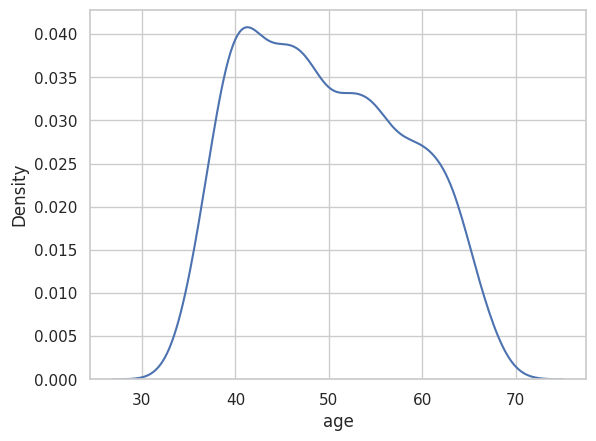

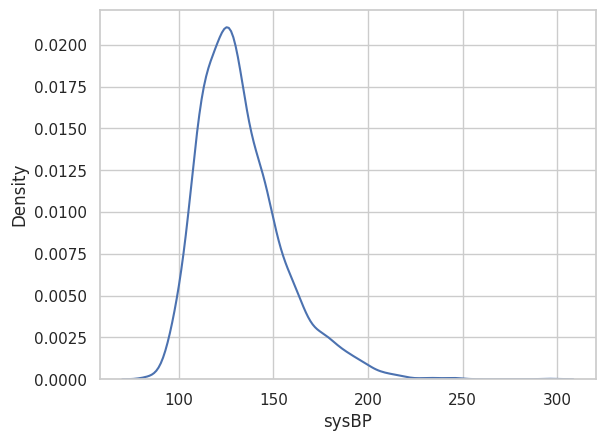

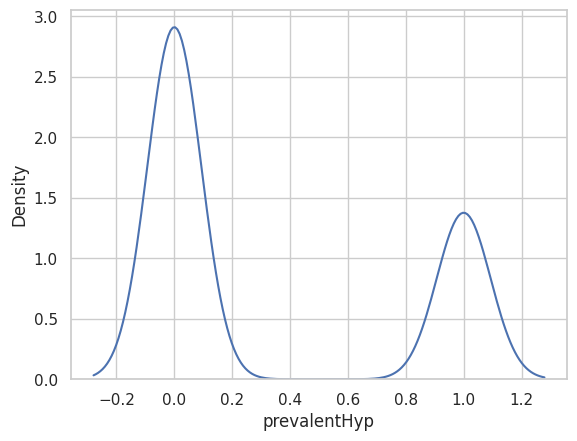

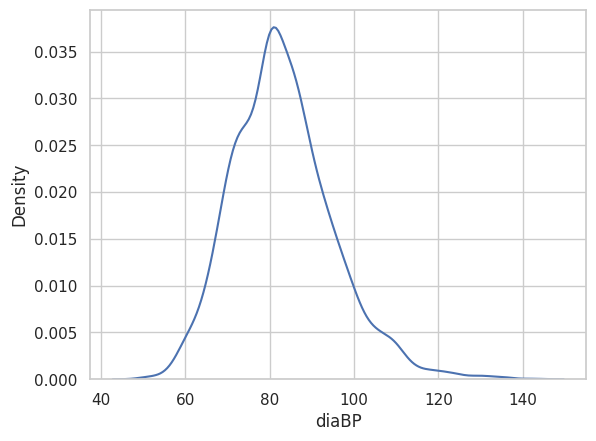

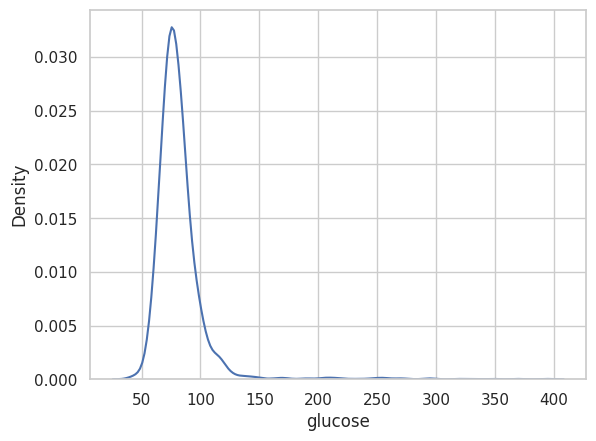

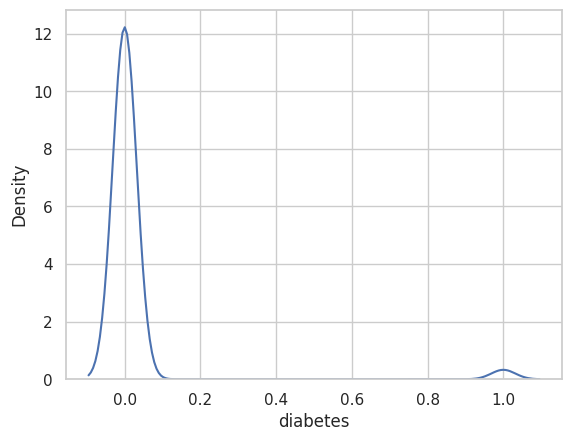

In [ ]:
for feature in variables_of_interest:
  sns.kdeplot(data = train_data, x = feature)
  plt.show()

With respect to reading and cleaning the variables, there were no serious challenges since they were all numeric and the categorical variables already had values associated with them. One of the biggest challenges for decision trees were `null` values from the variables. The `glucose` variable was the only variable that had null values so imputation was relatively straightforward.

In [ ]:
# setup datasets
X_train = train_data.loc[:, variables_of_interest]
y_train = train_data.loc[:, target_variable]
X_test = test_data.loc[:, variables_of_interest]
y_test = test_data.loc[:, target_variable]

In [ ]:
print(train_data["age"].unique(), "\n")
print(train_data["age"].value_counts(), "\n")

[58 40 52 38 43 56 54 47 61 59 64 45 51 63 57 48 46 60 39 53 49 50 44 68
 41 65 55 34 35 37 66 42 62 67 36 33 32 70 69] 

age
48    139
42    139
40    138
46    137
41    136
39    125
45    125
43    116
44    116
55    113
52    113
38    112
47    107
53    104
54    103
51    101
50    100
49    100
56     93
58     91
60     90
61     87
59     86
63     85
57     84
62     75
64     66
37     63
36     60
65     50
67     31
35     30
66     29
34     14
68     10
33      5
69      4
70      2
32      1
Name: count, dtype: int64 



In [ ]:
print(test_data["age"].unique(), "\n")

[58 51 44 40 53 41 50 42 45 52 57 46 38 47 48 56 66 68 59 54 49 39 61 62
 67 43 64 37 34 35 55 36 63 65 60 69] 



In [ ]:
print(train_data["sysBP"].unique(), "\n")

[143.  122.  112.  130.  124.  126.  171.5 138.  114.  134.5 100.5 135.
 117.5 133.  142.  120.  131.  113.  110.  131.5 101.   96.  102.5 127.5
 116.  162.  146.  115.  127.  140.5 132.  112.5 145.  148.  141.  150.
  99.  195.  107.5 109.  116.5 165.  149.  183.   93.5 140.  124.5 193.
 122.5 119.  102.  134.  132.5 128.  141.5 111.  106.  129.  178.  125.
 136.  137.5 151.5 153.  125.5 188.  174.  142.5 157.  111.5 113.5 192.5
 105.5 146.5 160.  147.  158.  214.  151.  152.  155.5 155.  144.  117.
 121.  105.  115.5 160.5 137.  126.5 118.  190.  184.5  94.  180.  147.5
 108.  199.  130.5 119.5  95.  118.5 175.  154.  152.5 197.  103.  150.5
 139.  100.  133.5 143.5 173.  107.  123.  220.  168.5 187.  106.5 205.
 164.5  98.  108.5 172.5 185.  163.  159.  120.5 144.5 202.5  92.  244.
 153.5 168.  205.5 114.5 136.5 167.  110.5 166.5 109.5 170.5 163.5 206.
 176.  139.5 194.  121.5 162.5 104.  158.5 154.5 156.  145.5  97.  196.
 171.  164.  161.5 184.  135.5  97.5 215.  166.  156.5 157.5

In [ ]:
print(test_data["sysBP"].unique(), "\n")

[126.  135.  147.5 138.5 110.  140.5 129.5 102.  139.  130.  126.5 107.5
 157.  144.  146.5 141.5 115.5 105.  132.  124.  128.  127.  147.  120.
 140.  146.  106.  109.  112.5 118.  122.  158.  122.5 125.  152.   97.
 114.  121.  111.  155.  171.  141.  145.  129.  119.  127.5 123.  117.
 152.5 131.5 134.  117.5 138.  101.  116.5 167.5 142.  154.  108.  100.
 160.  131.  159.  111.5 133.  158.5 112.  115.  137.5 153.  207.  116.
 182.5 195.  136.  151.  210.  125.5 150.  172.5 107.  156.  137.  165.
 174.  160.5 149.  168.5 130.5 164.   95.5 148.  143.5 113.5  97.5 118.5
 102.5 120.5 108.5 119.5 170.  166.  168.  113.  174.5 204.   92.5  98.
 124.5 103.  202.   99.5 149.5 133.5 132.5 180.  175.  181.  142.5 128.5
 167.  183.  215.  104.  150.5  94.  121.5 173.  162.5 162.  136.5 196.
 103.5 176.  143.  169.  156.5 114.5 164.5 135.5 186.5 191.  110.5 197.
 200.  134.5 206.  189.   96.  123.5 187.  163.5 192.5  95.  161.   99.
 100.5 139.5 177.  213.  176.5 105.5 184.  154.5 207.5 163.  

In [ ]:
print(train_data["prevalentHyp"].unique(), "\n")
print(train_data["prevalentHyp"].value_counts(), "\n")

[0 1] 

prevalentHyp
0    2159
1    1021
Name: count, dtype: int64 



In [ ]:
print(test_data["prevalentHyp"].unique(), "\n")
print(test_data["prevalentHyp"].value_counts(), "\n")

[0 1] 

prevalentHyp
0    764
1    296
Name: count, dtype: int64 



In [ ]:
print(train_data["diaBP"].unique(), "\n")
print(train_data["diaBP"].value_counts(), "\n")

[104.   82.   71.   94.   92.   83.  105.5  96.   76.   87.   66.   80.
  82.5  86.   90.   85.   68.   77.5  68.5  72.   72.5  81.5  91.   84.
  78.   75.   66.5  76.5  95.   77.   93.   70.   62.  100.  110.   73.
  81.   62.5 108.   58.   92.5  79.   69.   89.5  85.5 103.   61.   88.
 106.   71.5  63.5  97.  104.5  98.   74.  113.   60.   57.5  73.5  86.5
  65.  109.  102.   99.5  84.5  80.5  70.5  78.5  90.5  74.5  67.5  67.
  88.5  89.   99.   97.5  50.  118.   63.   79.5  98.5 128.  107.5 130.
  87.5 105.  101.   91.5 124.  123.  107.   94.5 106.5 100.5 111.   75.5
  64.  103.5 115.  121.   95.5  57.   64.5 119.  112.  102.5  93.5  83.5
 129.   69.5 120.   59.  109.5  55.   96.5 112.5 133.   54.  115.5  65.5
 114.  125.   52.  110.5 135.   59.5 116.  108.5  56.  101.5 136.   51.
 124.5 117.   60.5 142.5 116.5 117.5 122.5] 

diaBP
80.0     198
82.0     106
84.0     102
85.0     102
81.0      98
        ... 
115.5      1
135.0      1
110.5      1
129.0      1
122.5      1
Name: cou

In [ ]:
print(train_data["glucose"].unique(), "\n")
print(train_data["glucose"].value_counts(), "\n")

[ 87.  77.  nan  75.  74. 104.  69.  90.  91.  81.  89.  86.  84.  73.
  95.  65. 103.  76.  85.  92.  72.  62.  93.  68.  67. 122. 102.  79.
  66.  83.  78.  64.  63.  58.  71. 115.  70.  96.  60.  82.  94.  88.
 167. 117. 215.  48. 108. 268. 100.  80.  99. 135.  97.  55. 274.  40.
 118.  47.  56. 112. 248. 107. 105.  61. 260. 170. 148. 120. 225.  98.
  59. 332. 110. 206. 129.  57. 114. 101. 113. 111. 127. 121.  45. 147.
  50. 244. 106. 394. 173. 116. 137. 145. 123.  44. 172.  54. 142. 348.
 119. 320.  53. 136. 210.  43. 144. 292. 125. 294. 130. 131. 255. 160.
  52. 207. 297. 216. 166. 109. 126. 235. 140. 270. 250. 193. 256. 150.
 202. 254. 370. 191. 186.] 

glucose
75.0     147
77.0     126
73.0     119
80.0     117
70.0     113
        ... 
348.0      1
119.0      1
320.0      1
136.0      1
186.0      1
Name: count, Length: 130, dtype: int64 



In [ ]:
print(train_data["diabetes"].unique(), "\n")
print(train_data["diabetes"].value_counts(), "\n")

[0 1] 

diabetes
0    3097
1      83
Name: count, dtype: int64 



In [ ]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3180 non-null   int64  
 1   sysBP         3180 non-null   float64
 2   prevalentHyp  3180 non-null   int64  
 3   diaBP         3180 non-null   float64
 4   glucose       2895 non-null   float64
 5   diabetes      3180 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 149.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1060 non-null   int64  
 1   sysBP         1060 non-null   float64
 2   prevalentHyp  1060 non-null   int64  
 3   diaBP         1060 non-null   float64
 4   glucose       957 non-null    float64
 5   diabetes      1060 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 49.8 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create a pipeline
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy = "mean"))
])

In [ ]:
X_train_tr = num_pipeline.fit_transform(X_train)
X_test_tr = num_pipeline.fit_transform(X_test)

In [ ]:
print(y_train)

      TenYearCHD
0              1
1              0
2              0
3              0
4              0
...          ...
3175           0
3176           0
3177           1
3178           0
3179           0

[3180 rows x 1 columns]


##Linear Regression

The data cleaning process for the Framingham Heart Study dataset involved several crucial steps to ensure the data was ready for analysis and model building. Initially, we identified and removed an unnecessary index column labeled 'Unnamed: 0', which did not hold any relevant information for our analysis. We then addressed missing values in several key features, including 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', and 'glucose'. These missing entries were handled through imputation to maintain the integrity of the dataset. For categorical variables such as 'education', the mode (most frequent value) was used for imputation, ensuring consistency with existing data trends. For numerical variables, we employed the median of the data to fill gaps, this approach helped mitigate the impact of outliers and maintained the distribution's central tendency.

Following imputation, the dataset underwent further scrutiny to prepare for the predictive modeling. This included checking for any remaining inconsistencies and confirming that no null values were left. Additionally, data transformation strategies were employed to normalize distributions and scale numerical features, essential steps for many statistical models to perform optimally. For example, the log of each of the numerical variables which were right skewed was taken and used.

# **Results**

## kMeans Clustering

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

kMeans clustering (kMC) was used to identify predictors for CHD development, which would hopefully act as a starting point for other methods. As discussed in the data section, the kMC was done in two rounds: lifestyle and vitals.

For each round, the selected variables were put into subset dataframes which were then analyzed with a scree plot to find the optimal number of clusters. From there, the KMeans algorithm from the sklearn.cluster library was used to create and fit the model. Seaborn’s pairplot feature was used to visualize the variables and their clustering. Finally, the TenYearCHD was grouped by the clusters and summarized for assessment.


**kMC 1: Lifestyle**

Using kMeans clustering to identify patterns based on diabetes, cigarette use, and BMI

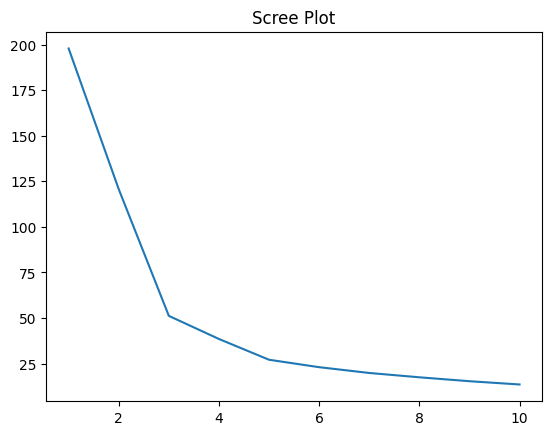

In [23]:
# scree plot to find the optimal number of clusters
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # training error
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(kmc1) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

3 clusters is the most optimal (the elbow).

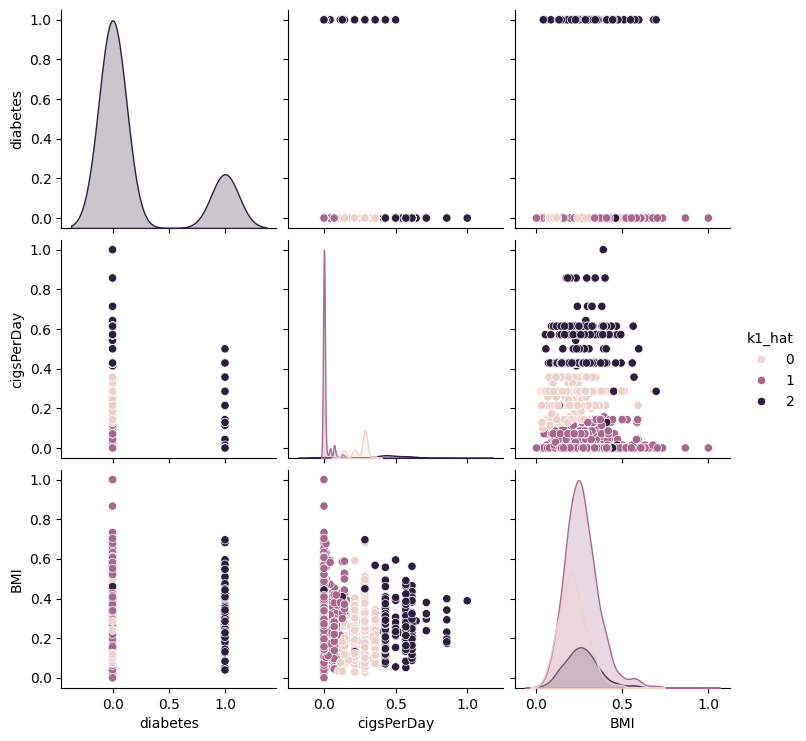

In [26]:
# kmc model
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(kmc1)
kmc1['k1_hat'] = model.labels_

# visualize
viz = sns.pairplot(data = kmc1, hue = 'k1_hat')

In [28]:
df1['k1_hat'] = model.labels_
df1.loc[:,['TenYearCHD','k1_hat']].groupby('k1_hat').describe()

TenYearCHD                                             
            count      mean       std  min  25%  50%  75%  max
k1_hat                                                        
0           864.0  0.148148  0.355453  0.0  0.0  0.0  0.0  1.0
1          1811.0  0.136389  0.343296  0.0  0.0  0.0  0.0  1.0
2           384.0  0.239583  0.427386  0.0  0.0  0.0  0.0  1.0

For the lifestyle approach to clustering, k = 3 clusters were most optimal as seen on the Scree plot’s elbow. The summary statistics showed that the third index produced a relatively higher mean CHD development occurrence. This cluster corresponded to high levels of cigarettes per day and having diabetes. This cluster was evenly distributed across BMIs.  

**kMC 2: Vitals**

Using kMeans clustering to identify patterns in CHD based on vitals, specifically total cholesterol, systolic blood pressure, heart rate, and glucose

In [ ]:
# clean & normalize variables

df2 = df.loc[:,['totChol','sysBP','heartRate','glucose','TenYearCHD']]

df2 = df2.dropna()

def maxmin(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

chd = df2['TenYearCHD']
kmc2 = df2.loc[:,['totChol','sysBP','heartRate','glucose']]

kmc2 = kmc2.apply(maxmin)

kmc2

,totChol,sysBP,heartRate,glucose
0,0.191851,0.281324,0.322917,0.132768
1,0.156197,0.182033,0.427083,0.104520
3,0.106961,0.219858,0.687500,0.098870
4,0.161290,0.191489,0.322917,0.096045
6,0.220713,0.416076,0.489583,0.180791
...,...,...,...,...
3174,0.361630,0.385343,0.375000,0.166667
3175,0.215620,0.234043,0.145833,0.169492
3176,0.300509,0.252955,0.302083,0.059322
3177,0.344652,0.243499,0.208333,0.096045


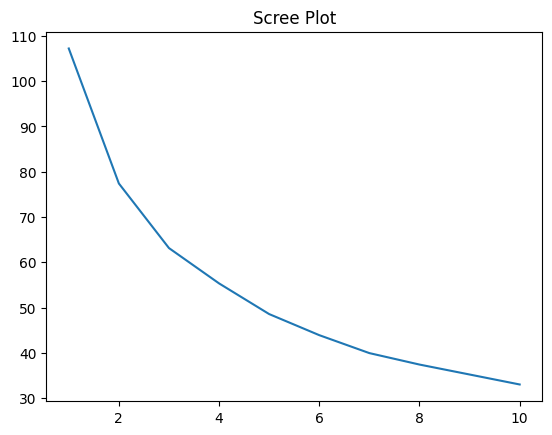

In [ ]:
#scree plot
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(kmc2) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

3 clusters is the most optimal

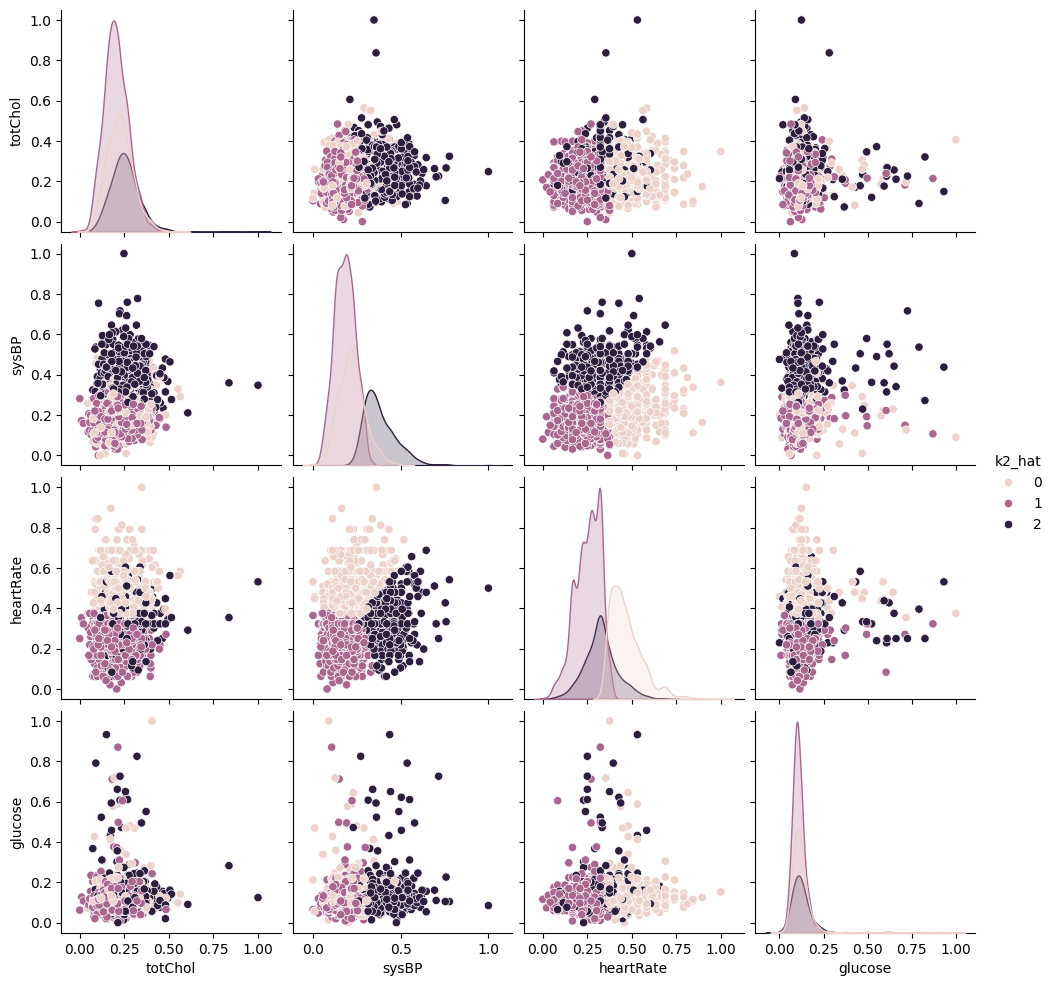

In [ ]:
# kmc model
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(kmc2)
kmc2['k2_hat'] = model.labels_

# visualize
viz = sns.pairplot(data = kmc2, hue = 'k2_hat')

In [ ]:
df2['k2_hat'] = model.labels_
df2.loc[:,['TenYearCHD','k2_hat'] ].groupby('k2_hat').describe()

TenYearCHD                                             
            count      mean       std  min  25%  50%  75%  max
k2_hat                                                        
0           859.0  0.137369  0.344437  0.0  0.0  0.0  0.0  1.0
1          1433.0  0.113747  0.317615  0.0  0.0  0.0  0.0  1.0
2           595.0  0.287395  0.452928  0.0  0.0  0.0  1.0  1.0

For the vitals approach to clustering, k = 3 clusters were most optimal. The statistics showed the third cluster with a higher mean CHD development occurrence. This cluster cleanly corresponded to solely a high systolic BP, and everything else was evenly distributed.

## K-Nearest Neighbors

### Data Cleaning

In [ ]:
import pandas as pd

train_data_path = './data/fhs_train_jalen.csv'
test_data_path = './data/fhs_test_jalen.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head(), train_data.describe(), train_data.info(), test_data.head(), test_data.describe(), test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3180 non-null   int64  
 1   sex              3180 non-null   int64  
 2   age              3180 non-null   int64  
 3   education        3095 non-null   float64
 4   currentSmoker    3180 non-null   int64  
 5   cigsPerDay       3156 non-null   float64
 6   BPMeds           3143 non-null   float64
 7   prevalentStroke  3180 non-null   int64  
 8   prevalentHyp     3180 non-null   int64  
 9   diabetes         3180 non-null   int64  
 10  totChol          3141 non-null   float64
 11  sysBP            3180 non-null   float64
 12  diaBP            3180 non-null   float64
 13  BMI              3165 non-null   float64
 14  heartRate        3180 non-null   int64  
 15  glucose          2895 non-null   float64
 16  TenYearCHD       3180 non-null   int64  
dtypes: float64(8),

(   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
 0        1267    1   58        1.0              0         0.0     0.0   
 1        1209    0   40        1.0              1        15.0     0.0   
 2        2050    0   52        1.0              0         0.0     0.0   
 3        1183    1   38        2.0              1        43.0     0.0   
 4        3225    0   43        1.0              0         0.0     0.0   
 
    prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
 0                0             0         0    220.0  143.0  104.0  29.85   
 1                0             0         0    199.0  122.0   82.0  22.16   
 2                0             0         0    275.0  112.0   71.0  25.68   
 3                0             1         0    170.0  130.0   94.0  23.90   
 4                0             0         0    202.0  124.0   92.0  21.26   
 
    heartRate  glucose  TenYearCHD  
 0         75     87.0           1  
 1         85   

In [ ]:
# Drop first unnamed column from both datasets
train_data.drop(columns='Unnamed: 0', inplace=True)
test_data.drop(columns='Unnamed: 0', inplace=True)

# Impute missing values
# For continuous variables, used median to avoid the effect of outliers.
# For categorical variables, used mode.
categorical_cols = ['education', 'BPMeds']
continuous_cols = ['cigsPerDay', 'totChol', 'BMI', 'glucose']

# Impute training data
for col in categorical_cols:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value, inplace=True)

for col in continuous_cols:
    median_value = train_data[col].median()
    train_data[col].fillna(median_value, inplace=True)

# Impute testing data the same way to keep consistent
for col in categorical_cols:
    mode_value = test_data[col].mode()[0]
    test_data[col].fillna(mode_value, inplace=True)

for col in continuous_cols:
    median_value = test_data[col].median()
    test_data[col].fillna(median_value, inplace=True)

train_missing_after = train_data.isnull().sum().sum()
test_missing_after = test_data.isnull().sum().sum()

train_missing_after, test_missing_after


(0, 1)

In [ ]:
# Impute the remaining missing value in the testing data
test_data['heartRate'].fillna(test_data['heartRate'].median(), inplace=True)

test_missing_final = test_data.isnull().sum().sum()

test_missing_final


0

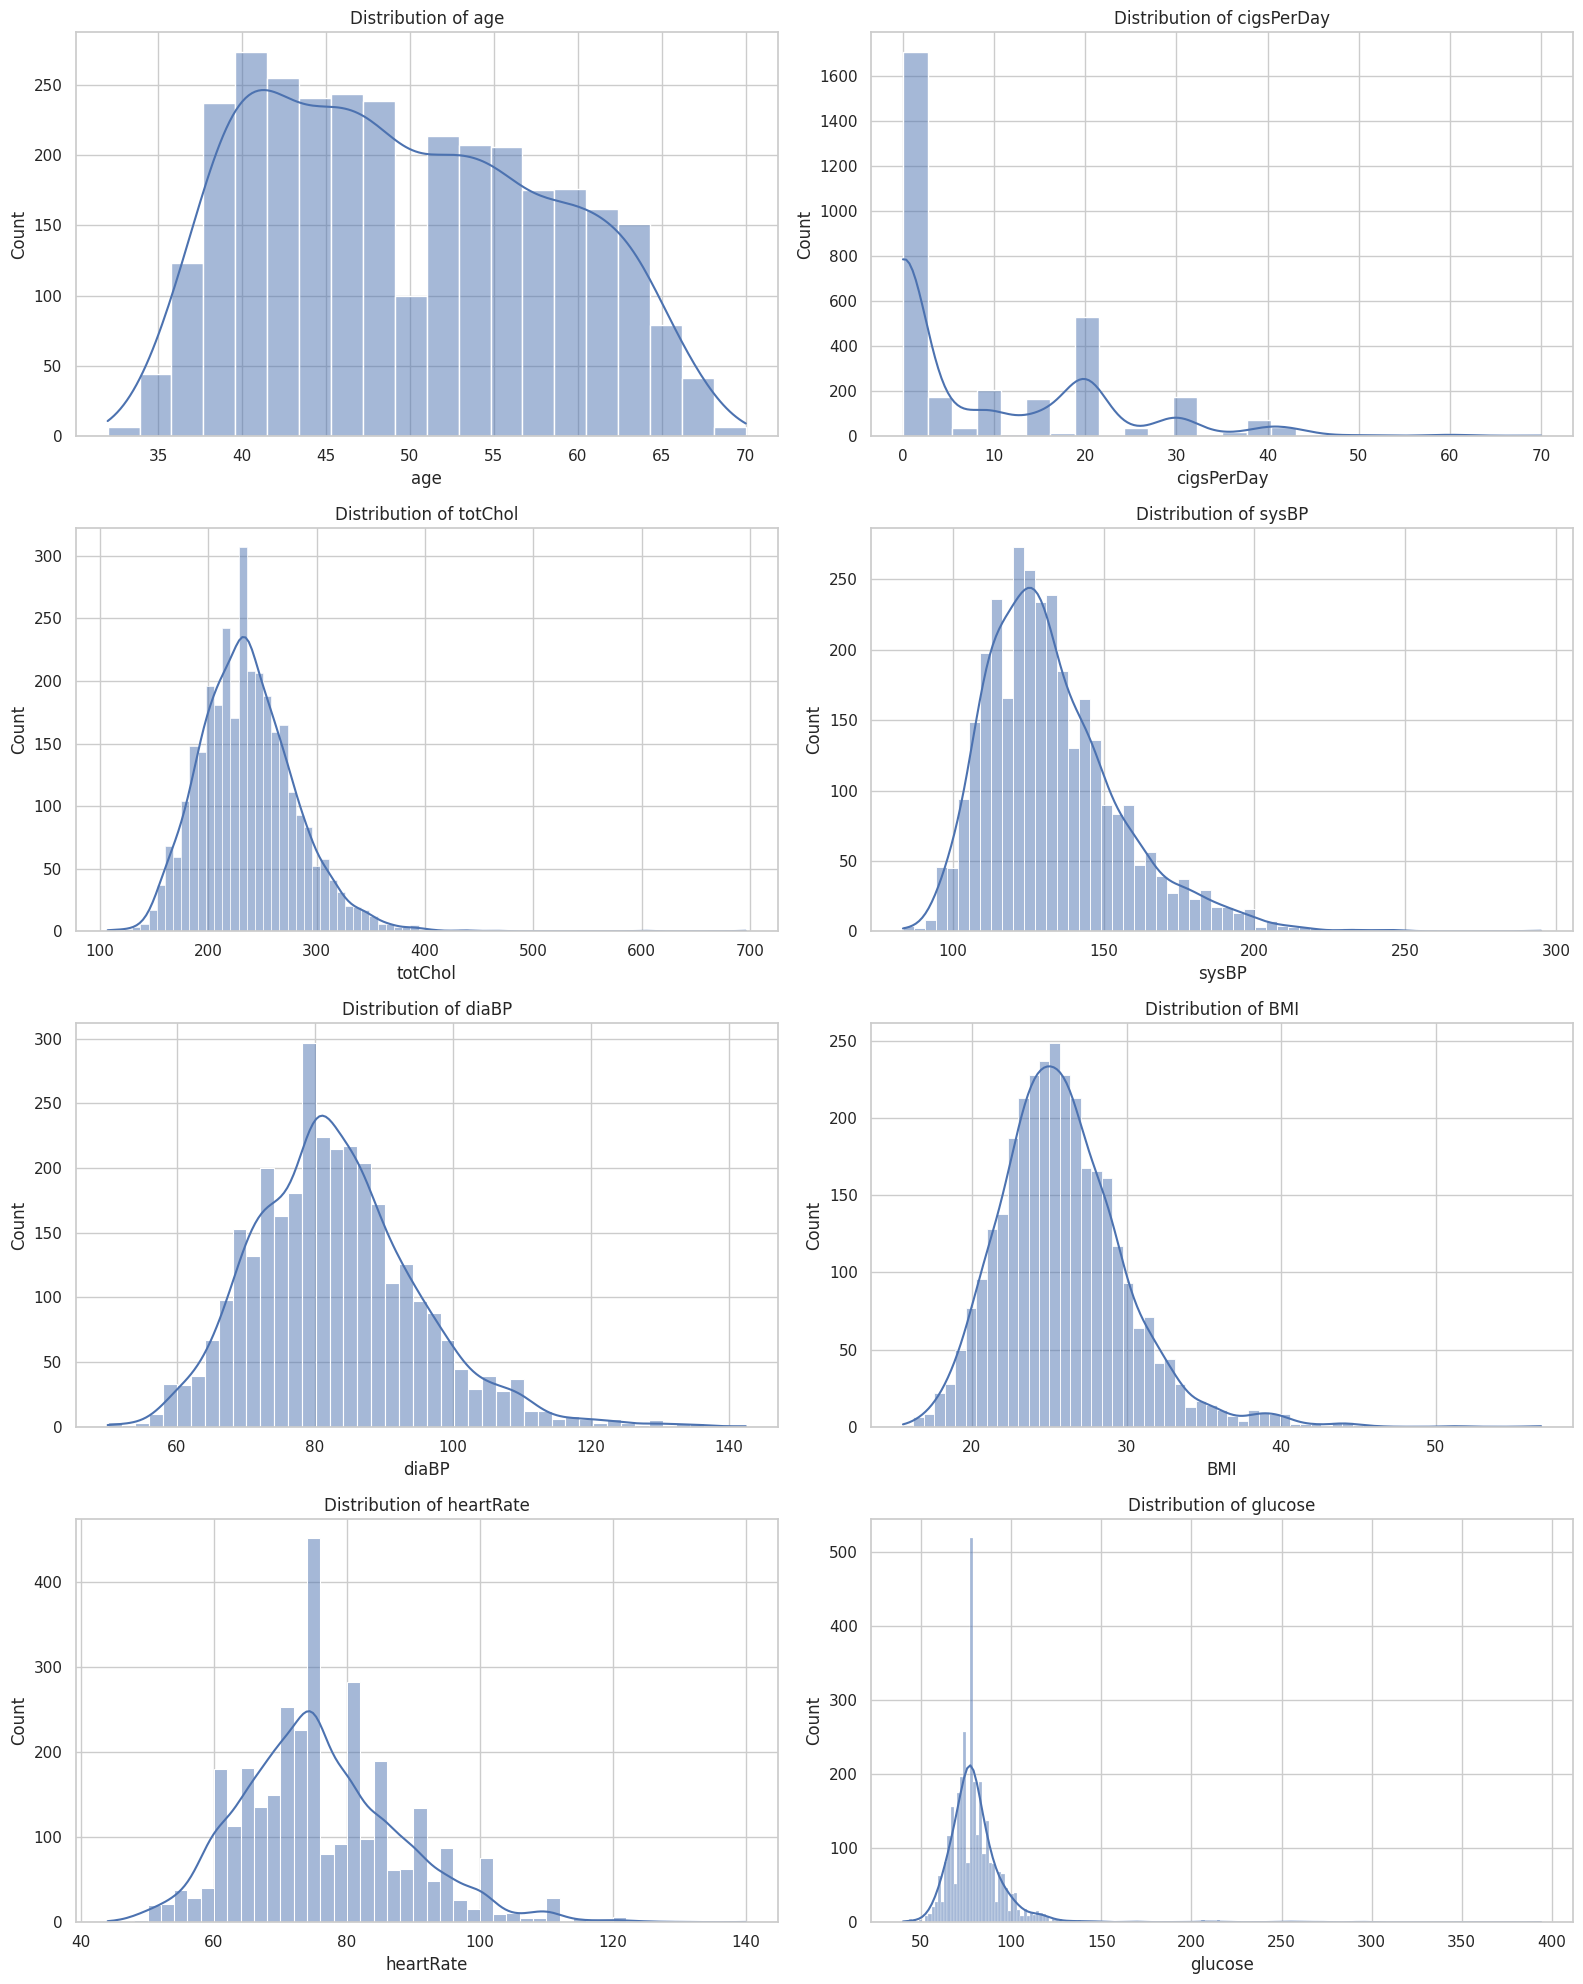

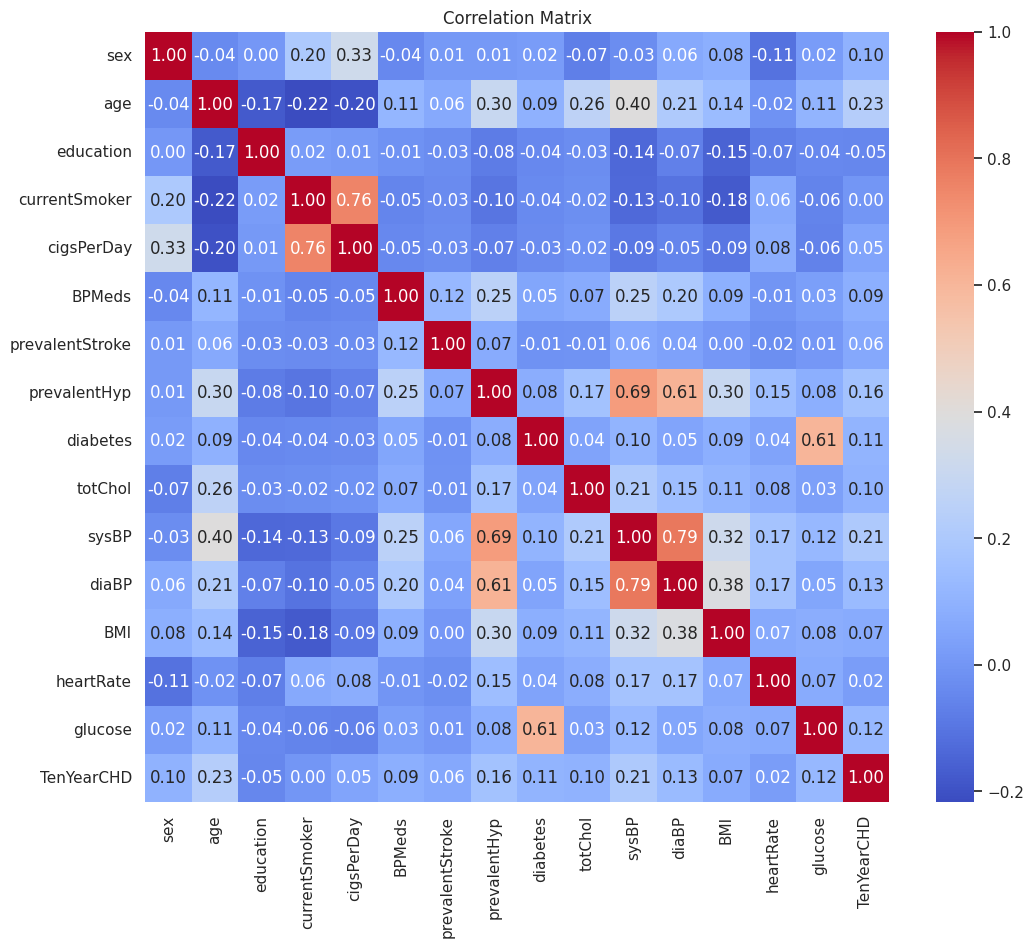

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
cont_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i, col in enumerate(cont_columns):
    sns.histplot(train_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

fig.tight_layout()
plt.show()

corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### K-Nearest Neigbors Model

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = train_data.drop('TenYearCHD', axis=1)
y = train_data['TenYearCHD']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Setup KNN with 100 neighbors
knn_model = KNeighborsClassifier(n_neighbors=100)

# Train the model on the entire scaled training data
knn_model.fit(X_scaled, y)

# Prepare test data (scaling)
X_test = test_data.drop('TenYearCHD', axis=1)
y_test = test_data['TenYearCHD']
X_test_scaled = scaler.transform(X_test)  # Use the same scaler as for training data

# Predict probabilities on the test set
y_test_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate R² score for the KNN model on the test data
r2_test_knn = r2_score(y_test, y_test_knn)

r2_test_knn


0.060099089376529635

The K-Nearest Neighbors (kNN) model was applied to predict the 10-year risk of coronary heart disease (CHD) using a comprehensive set of predictors from a health dataset. The model achieved a R² score of 0.0601, indicating that it explains approximately 6% of the variance in the occurrence of CHD based on the input features.

The kNN model's development followed a structured approach to data preparation, including careful handling of missing data and feature scaling. Missing values were systematically imputed using median values for continuous variables and mode values for categorical variables to maintain data integrity. Given the sensitivity of kNN to the scale of input features, all predictors were standardized to have zero mean and unit variance, ensuring that no single feature disproportionately influenced the model's distance calculations.

The R² value of 0.0601 signifies that the kNN model captures a modest portion of the variance in CHD risk. This level of explanatory power illustrates that while certain relationships between the predictors and the CHD occurrence are captured, the majority of the variance is driven by other factors not included or captured in this model. With an R² score highlighting limited explanatory power, it's clear that the predictive model, though informative to a degree, leaves a significant amount of variance unexplained. This outcome suggests a need for additional variables or more complex modeling techniques to better capture the multifaceted nature of CHD risk.


## Decision Tree Approach

Another model used to approach this problem were decision tree regressors. The model was trained on the six features with the highest correlation to the CHD. The depth of the tree was limited to only $10$. The metrics used for the decision tree were accuracy, $R^{2}$, and ROC AUC. The accuracy and $R^2$ seem to be pretty good around $83$% but the ROC AUC is around $50$% which is essentially guessing. The $R^2$ of $.83$ indicates that around $83$% of the variance was accounted for. An accuracy of $83$% indicates that the model correctly predicts $83$% of the data.

[Text(0.4923624067164179, 0.9545454545454546, 'age <= -0.133\ngini = 0.259\nsamples = 3180\nvalue = [2693, 487]'),
 Text(0.21159825870646767, 0.8636363636363636, 'glucose <= 6.378\ngini = 0.146\nsamples = 1563\nvalue = [1439, 124]'),
 Text(0.16138059701492538, 0.7727272727272727, 'diaBP <= 0.552\ngini = 0.142\nsamples = 1558\nvalue = [1438, 120]'),
 Text(0.07587064676616916, 0.6818181818181818, 'sysBP <= -2.164\ngini = 0.121\nsamples = 1255\nvalue = [1174, 81]'),
 Text(0.0708955223880597, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08084577114427861, 0.5909090909090909, 'sysBP <= 1.637\ngini = 0.119\nsamples = 1254\nvalue = [1174, 80]'),
 Text(0.07587064676616916, 0.5, 'age <= -1.068\ngini = 0.118\nsamples = 1253\nvalue = [1174, 79]'),
 Text(0.03731343283582089, 0.4090909090909091, 'glucose <= 1.679\ngini = 0.066\nsamples = 469\nvalue = [453, 16]'),
 Text(0.03233830845771144, 0.3181818181818182, 'diabetes <= 2.972\ngini = 0.062\nsamples = 468\nvalue = [453, 

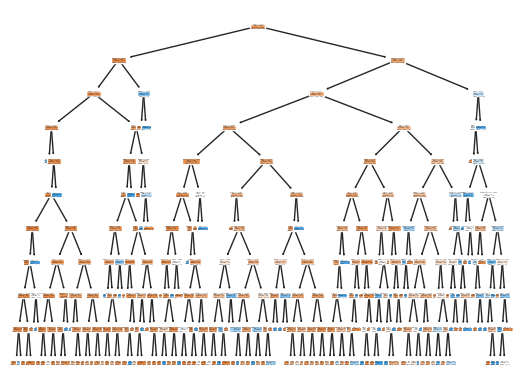

In [ ]:
from sklearn import tree

# create a decision tree
dt = tree.DecisionTreeClassifier(max_depth = 10)
dt.fit(X_train_tr, y_train)
tree.plot_tree(dt, feature_names = X_train.columns.to_list(), filled = True)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

# predict and check accuracy
y_hat_dt = dt.predict(X_test_tr)
acc_dt = accuracy_score(y_test, y_hat_dt) # calculate accuracy
r2_dt = dt.score(X_test_tr, y_test) # calculate r^2
roc_auc_dt = roc_auc_score(y_test, y_hat_dt) # area under curve
confusion_matrix = metrics.confusion_matrix(y_test, y_hat_dt)
print(confusion_matrix)

[[863  40]
 [136  21]]


In [ ]:
print("Accuracy:", acc_dt, "\nR squared:", r2_dt, "\nArea Under the ROC curve:", roc_auc_dt)

Accuracy: 0.8339622641509434 
R squared: 0.8339622641509434 
Area Under the ROC curve: 0.5447305866503023


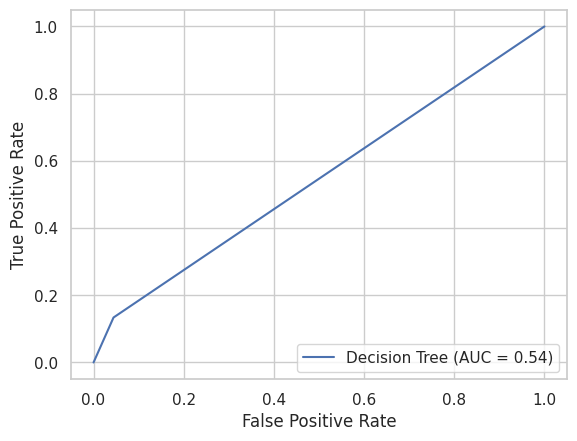

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat_dt)
roc_auc_dt = metrics.auc(fpr, tpr)

roc_curve = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc_dt, estimator_name = "Decision Tree")
roc_curve.plot()
plt.show()

This leaves into question why the accuracy and $R^2$ are so high compared to the ROC AUC. Possibilities include incorrect metrics for this particular downstream task or a discrepancy in how the metrics were actually measured. Further investigation is required to understand the discrepancy in the ROC AUC and the other metrics. However, the metrics do seem to suggest that decision trees with the six features with the highest correlation to the target could possibly be a viable approach for this problem. However, additional finetuning and modifications would be required to the model and possibly the data.

## Linear Regression Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/DS3001/project_chd/main/fhs_test.csv' # Create url to the chunk to be processed
test = pd.read_csv(url) # Download this chunk of data
print(test.head()) # Visually inspect the first few rows

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         674    0   58        1.0              1        20.0     0.0   
1        4070    0   51        3.0              0         0.0     0.0   
2        3150    0   44        2.0              1         9.0     0.0   
3        1695    0   40        2.0              1        20.0     0.0   
4        2692    1   58        2.0              1        20.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0      NaN  126.0   77.0  30.08   
1                0             0         0    264.0  135.0   83.0  26.68   
2                0             1         0      NaN  147.5   96.0  30.57   
3                0             0         0    271.0  138.5   88.0  27.24   
4                0             0         0    207.0  110.0   80.0  23.55   

   heartRate  glucose  TenYearCHD  
0       78.0      NaN           0  
1       60.0     74.0           

In [ ]:
url = 'https://raw.githubusercontent.com/DS3001/project_chd/main/fhs_train.csv' # Create url to the chunk to be processed
train = pd.read_csv(url) # Download this chunk of data
print(train.head()) # Visually inspect the first few rows

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

In [ ]:
train.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [ ]:
train_data_cleaned = train.drop(columns=['Unnamed: 0'])
train_data_cleaned.head()
test_data_cleaned = test.drop(columns=['Unnamed: 0'])

In [ ]:
missing_values_train = train_data_cleaned.isnull().sum()
missing_values_train[missing_values_train > 0]

education      85
cigsPerDay     24
BPMeds         37
totChol        39
BMI            15
glucose       285
dtype: int64

In [ ]:
missing_values_test = test_data_cleaned.isnull().sum()
missing_values_test[missing_values_test > 0]

education      20
cigsPerDay      5
BPMeds         16
totChol        11
BMI             4
heartRate       1
glucose       103
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer(strategy='median')

categorical_cols = ['education']
numerical_cols = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

train_data_cleaned[categorical_cols] = imputer_mode.fit_transform(train_data_cleaned[categorical_cols])
train_data_cleaned[numerical_cols] = imputer_median.fit_transform(train_data_cleaned[numerical_cols])

test_data_cleaned[categorical_cols] = imputer_mode.fit_transform(test_data_cleaned[categorical_cols])
test_data_cleaned[numerical_cols] = imputer_median.fit_transform(test_data_cleaned[numerical_cols])

print(train_data_cleaned.isnull().sum())
print(test_data_cleaned.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


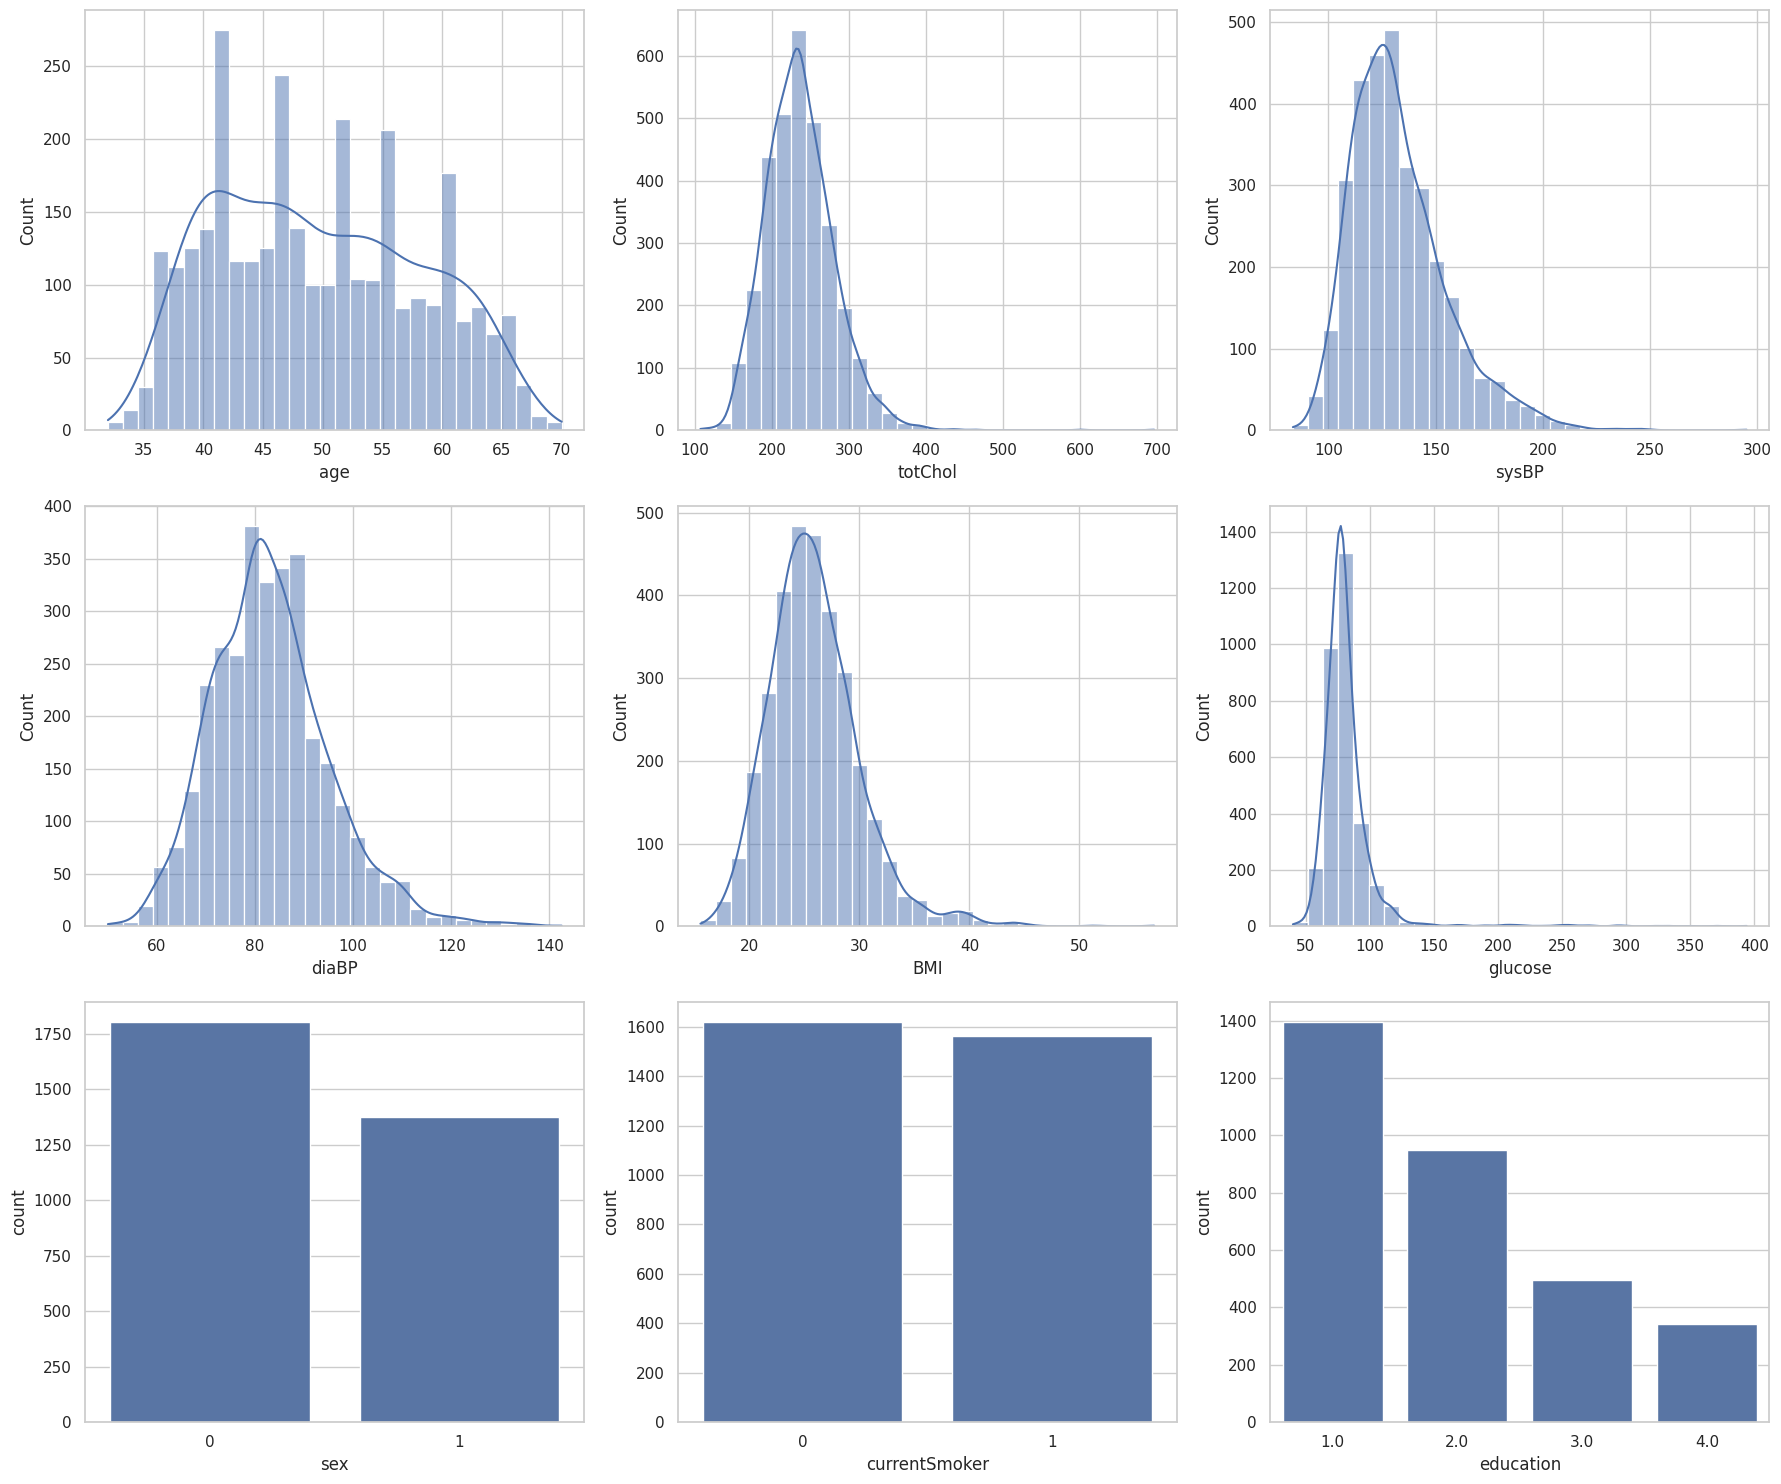

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

sns.histplot(data=train_data_cleaned, x='age', bins=30, kde=True, ax=axes[0, 0])
sns.histplot(data=train_data_cleaned, x='totChol', bins=30, kde=True, ax=axes[0, 1])
sns.histplot(data=train_data_cleaned, x='sysBP', bins=30, kde=True, ax=axes[0, 2])
sns.histplot(data=train_data_cleaned, x='diaBP', bins=30, kde=True, ax=axes[1, 0])
sns.histplot(data=train_data_cleaned, x='BMI', bins=30, kde=True, ax=axes[1, 1])
sns.histplot(data=train_data_cleaned, x='glucose', bins=30, kde=True, ax=axes[1, 2])

sns.countplot(data=train_data_cleaned, x='sex', ax=axes[2, 0])
sns.countplot(data=train_data_cleaned, x='currentSmoker', ax=axes[2, 1])
sns.countplot(data=train_data_cleaned, x='education', ax=axes[2, 2])

plt.tight_layout()
plt.show()

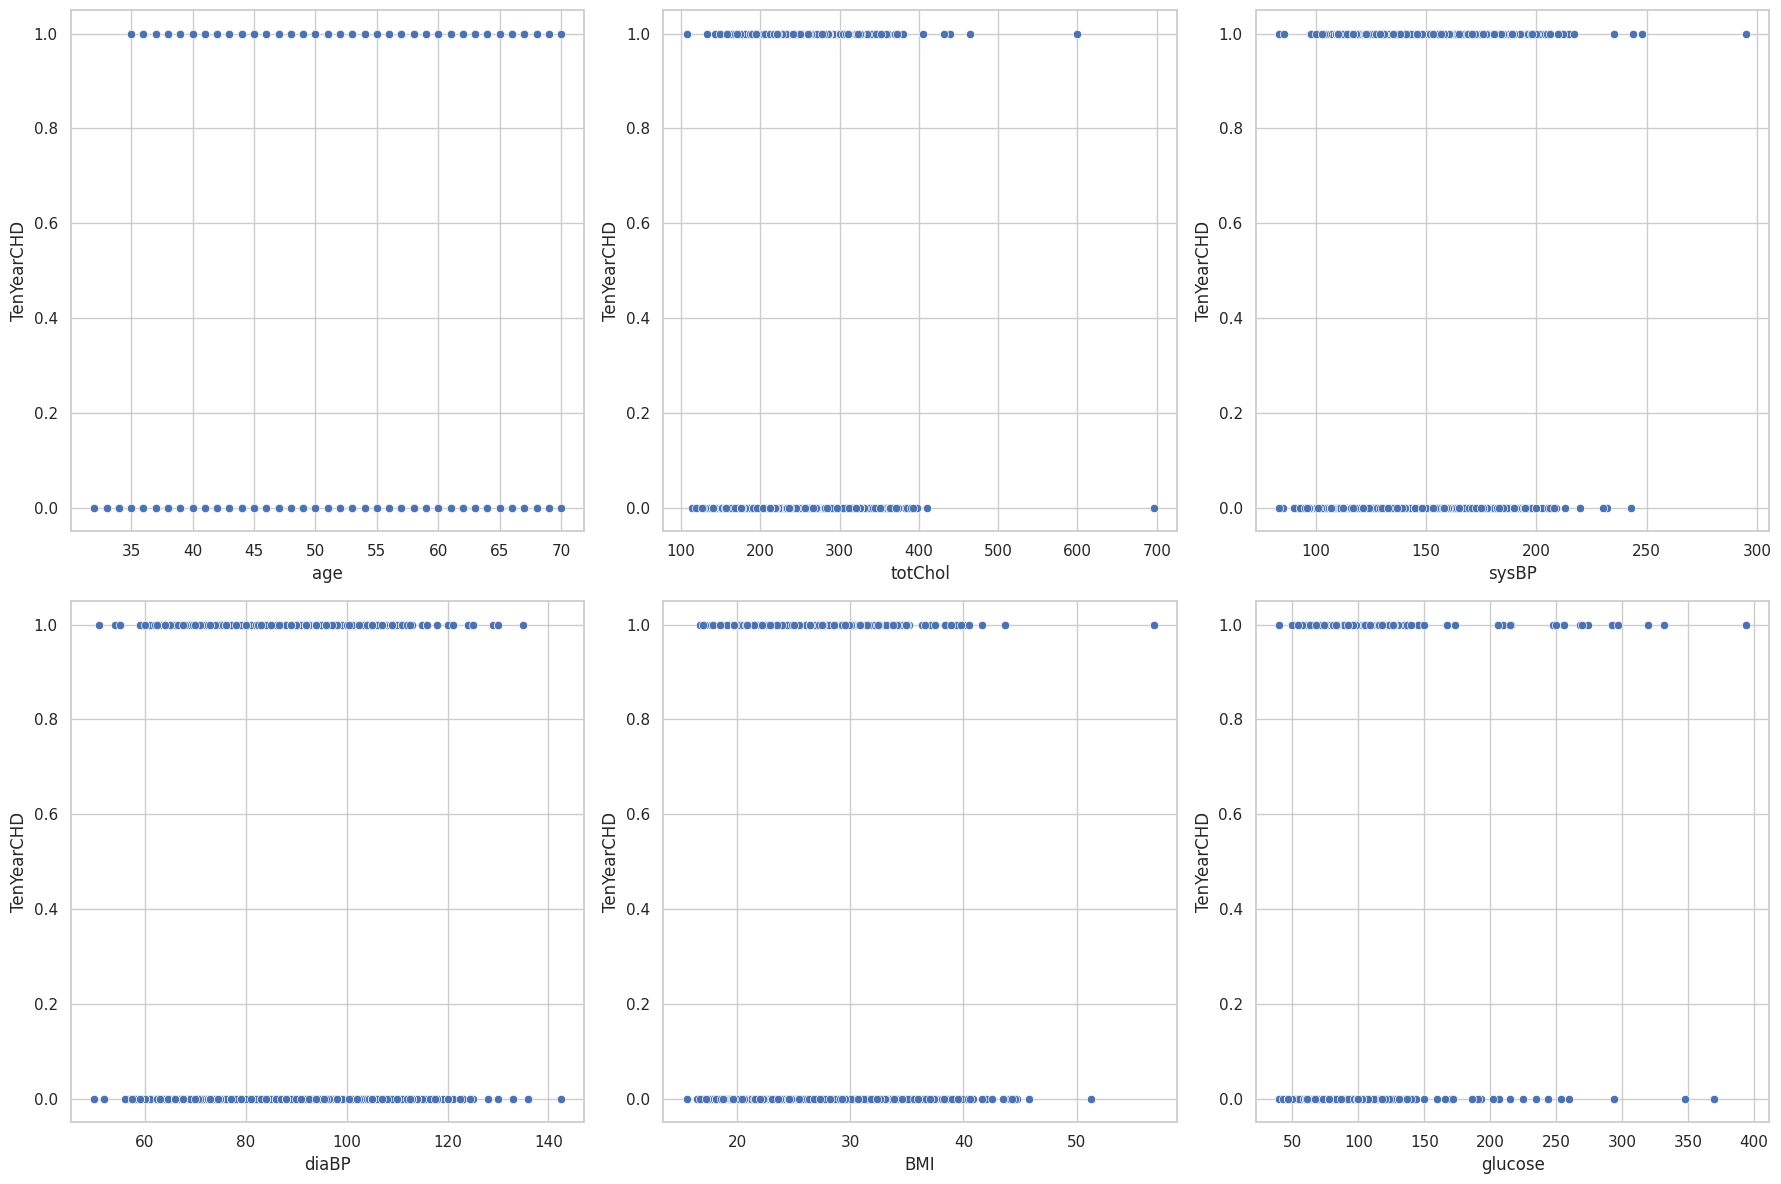

TenYearCHD         1.000000
age                0.225568
sysBP              0.205898
prevalentHyp       0.163910
diaBP              0.133094
glucose            0.123037
diabetes           0.105644
totChol            0.099083
sex                0.097138
BPMeds             0.086845
BMI                0.071823
prevalentStroke    0.062357
cigsPerDay         0.048593
heartRate          0.023205
currentSmoker      0.001644
education         -0.048983
Name: TenYearCHD, dtype: float64

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

sns.scatterplot(data=train_data_cleaned, x='age', y='TenYearCHD', ax=axes[0, 0])
sns.scatterplot(data=train_data_cleaned, x='totChol', y='TenYearCHD', ax=axes[0, 1])
sns.scatterplot(data=train_data_cleaned, x='sysBP', y='TenYearCHD', ax=axes[0, 2])
sns.scatterplot(data=train_data_cleaned, x='diaBP', y='TenYearCHD', ax=axes[1, 0])
sns.scatterplot(data=train_data_cleaned, x='BMI', y='TenYearCHD', ax=axes[1, 1])
sns.scatterplot(data=train_data_cleaned, x='glucose', y='TenYearCHD', ax=axes[1, 2])

plt.tight_layout()
plt.show()

correlation_matrix = train_data_cleaned.corr()
correlation_matrix['TenYearCHD'].sort_values(ascending=False)

In [ ]:
from sklearn.linear_model import LinearRegression
X = train_data_cleaned.drop('TenYearCHD',axis=1)
y = train_data_cleaned['TenYearCHD']
X_test = test_data_cleaned.drop('TenYearCHD',axis=1)
y_test = test_data_cleaned['TenYearCHD']

model = LinearRegression()
reg = model.fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_test, y_test)) # R squared measure

R-squared:  0.09222304760088695


In [ ]:
train_data_cleaned['totChol_log'] = np.log(train_data_cleaned['totChol'])
train_data_cleaned['glucose_log'] = np.log(train_data_cleaned['glucose'])
train_data_cleaned['heartRate_log'] = np.log(train_data_cleaned['heartRate'])
train_data_cleaned['BMI_log'] = np.log(train_data_cleaned['BMI'])
train_data_cleaned['diaBP_log'] = np.log(train_data_cleaned['diaBP'])
train_data_cleaned['sysBP_log'] = np.log(train_data_cleaned['sysBP'])

test_data_cleaned['totChol_log'] = np.log(test_data_cleaned['totChol'])
test_data_cleaned['glucose_log'] = np.log(test_data_cleaned['glucose'])
test_data_cleaned['heartRate_log'] = np.log(test_data_cleaned['heartRate'])
test_data_cleaned['BMI_log'] = np.log(test_data_cleaned['BMI'])
test_data_cleaned['diaBP_log'] = np.log(test_data_cleaned['diaBP'])
test_data_cleaned['sysBP_log'] = np.log(test_data_cleaned['sysBP'])

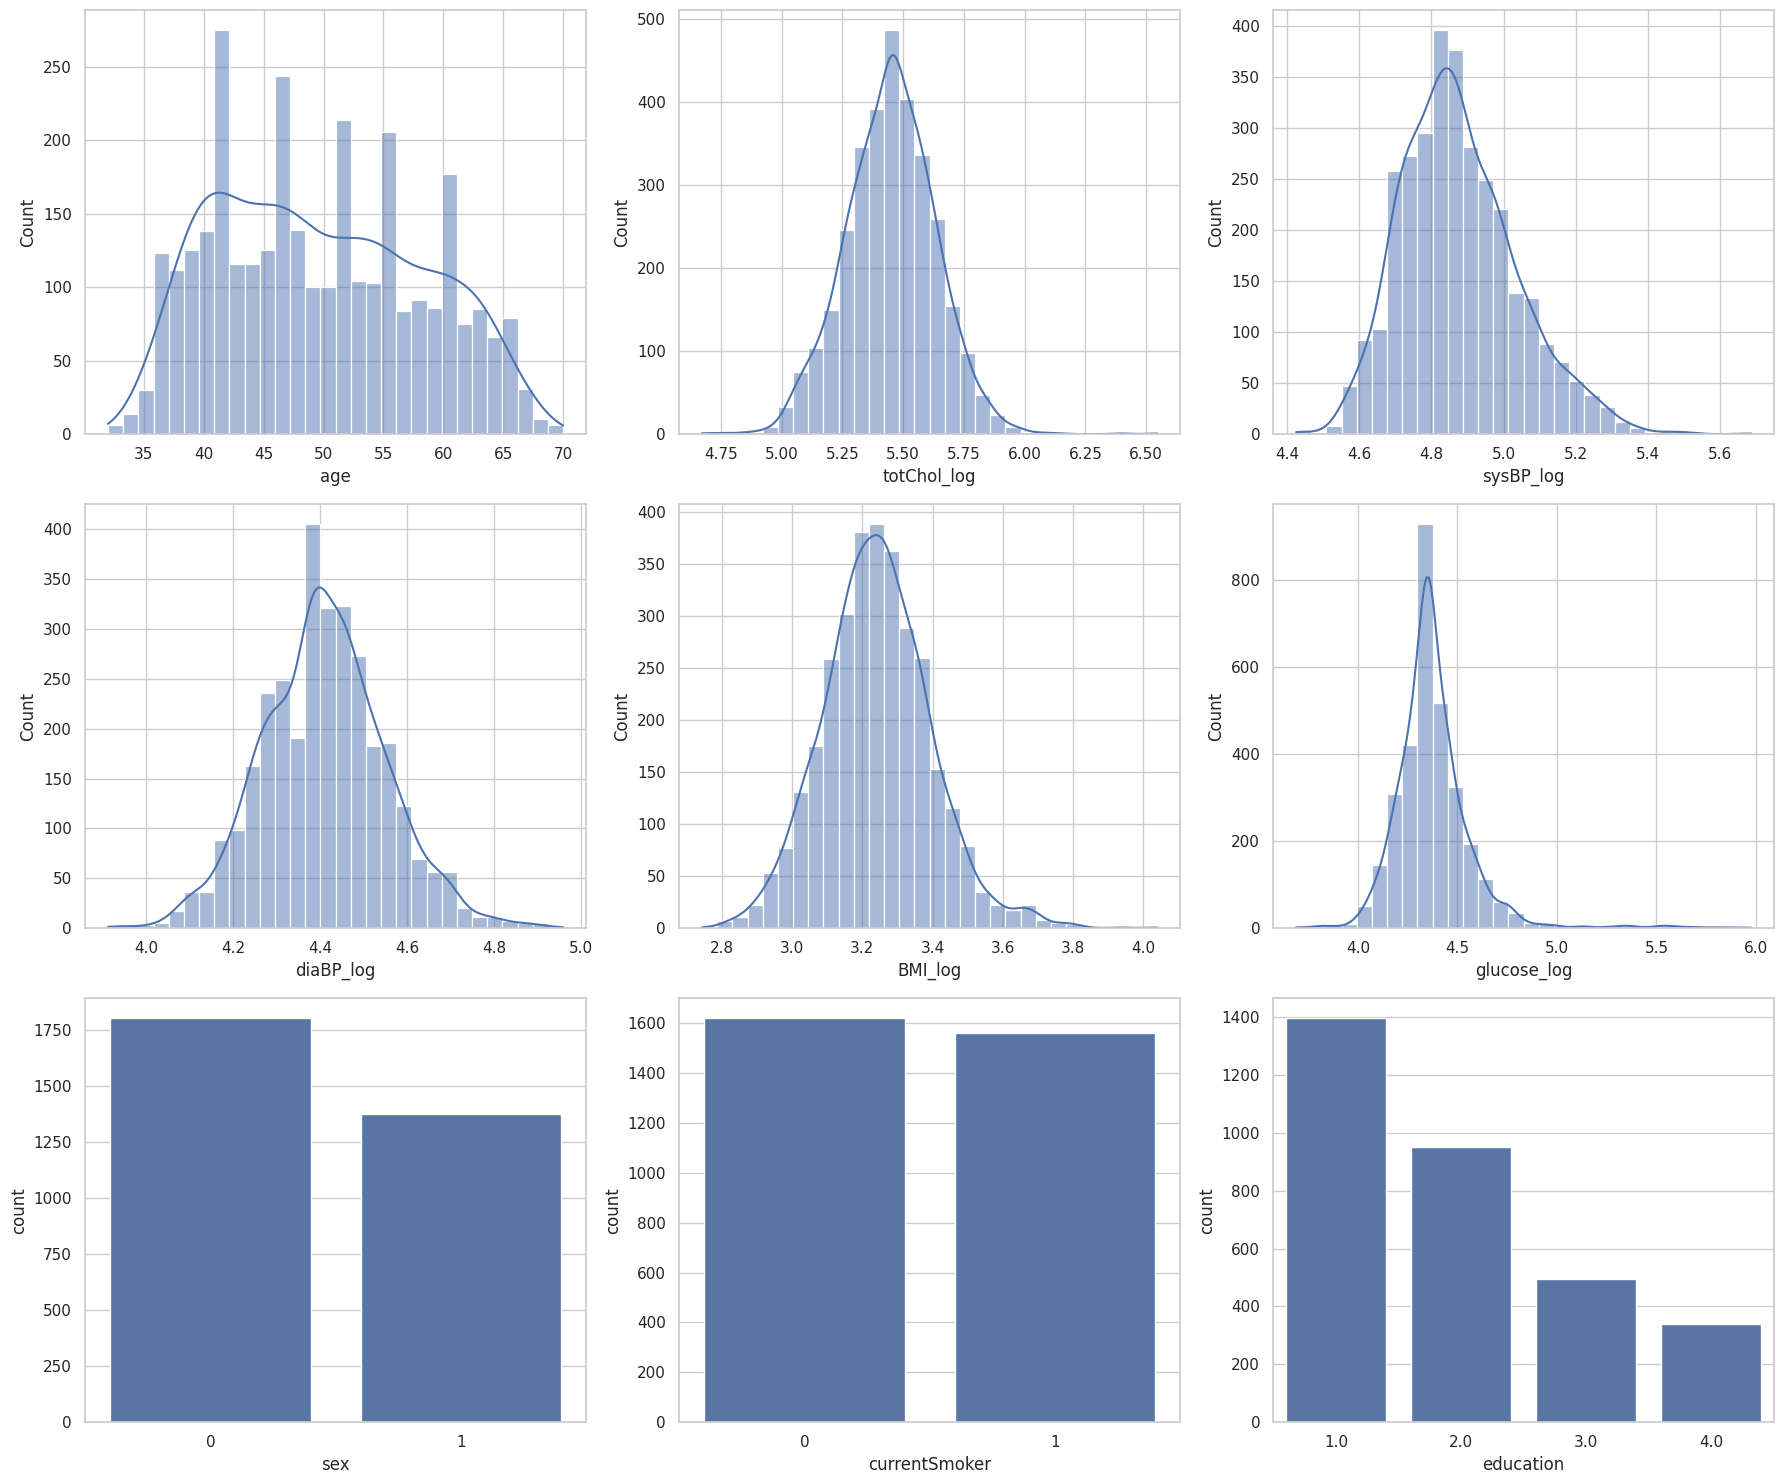

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

sns.histplot(data=train_data_cleaned, x='age', bins=30, kde=True, ax=axes[0, 0])
sns.histplot(data=train_data_cleaned, x='totChol_log', bins=30, kde=True, ax=axes[0, 1])
sns.histplot(data=train_data_cleaned, x='sysBP_log', bins=30, kde=True, ax=axes[0, 2])
sns.histplot(data=train_data_cleaned, x='diaBP_log', bins=30, kde=True, ax=axes[1, 0])
sns.histplot(data=train_data_cleaned, x='BMI_log', bins=30, kde=True, ax=axes[1, 1])
sns.histplot(data=train_data_cleaned, x='glucose_log', bins=30, kde=True, ax=axes[1, 2])

sns.countplot(data=train_data_cleaned, x='sex', ax=axes[2, 0])
sns.countplot(data=train_data_cleaned, x='currentSmoker', ax=axes[2, 1])
sns.countplot(data=train_data_cleaned, x='education', ax=axes[2, 2])

plt.tight_layout()
plt.show()

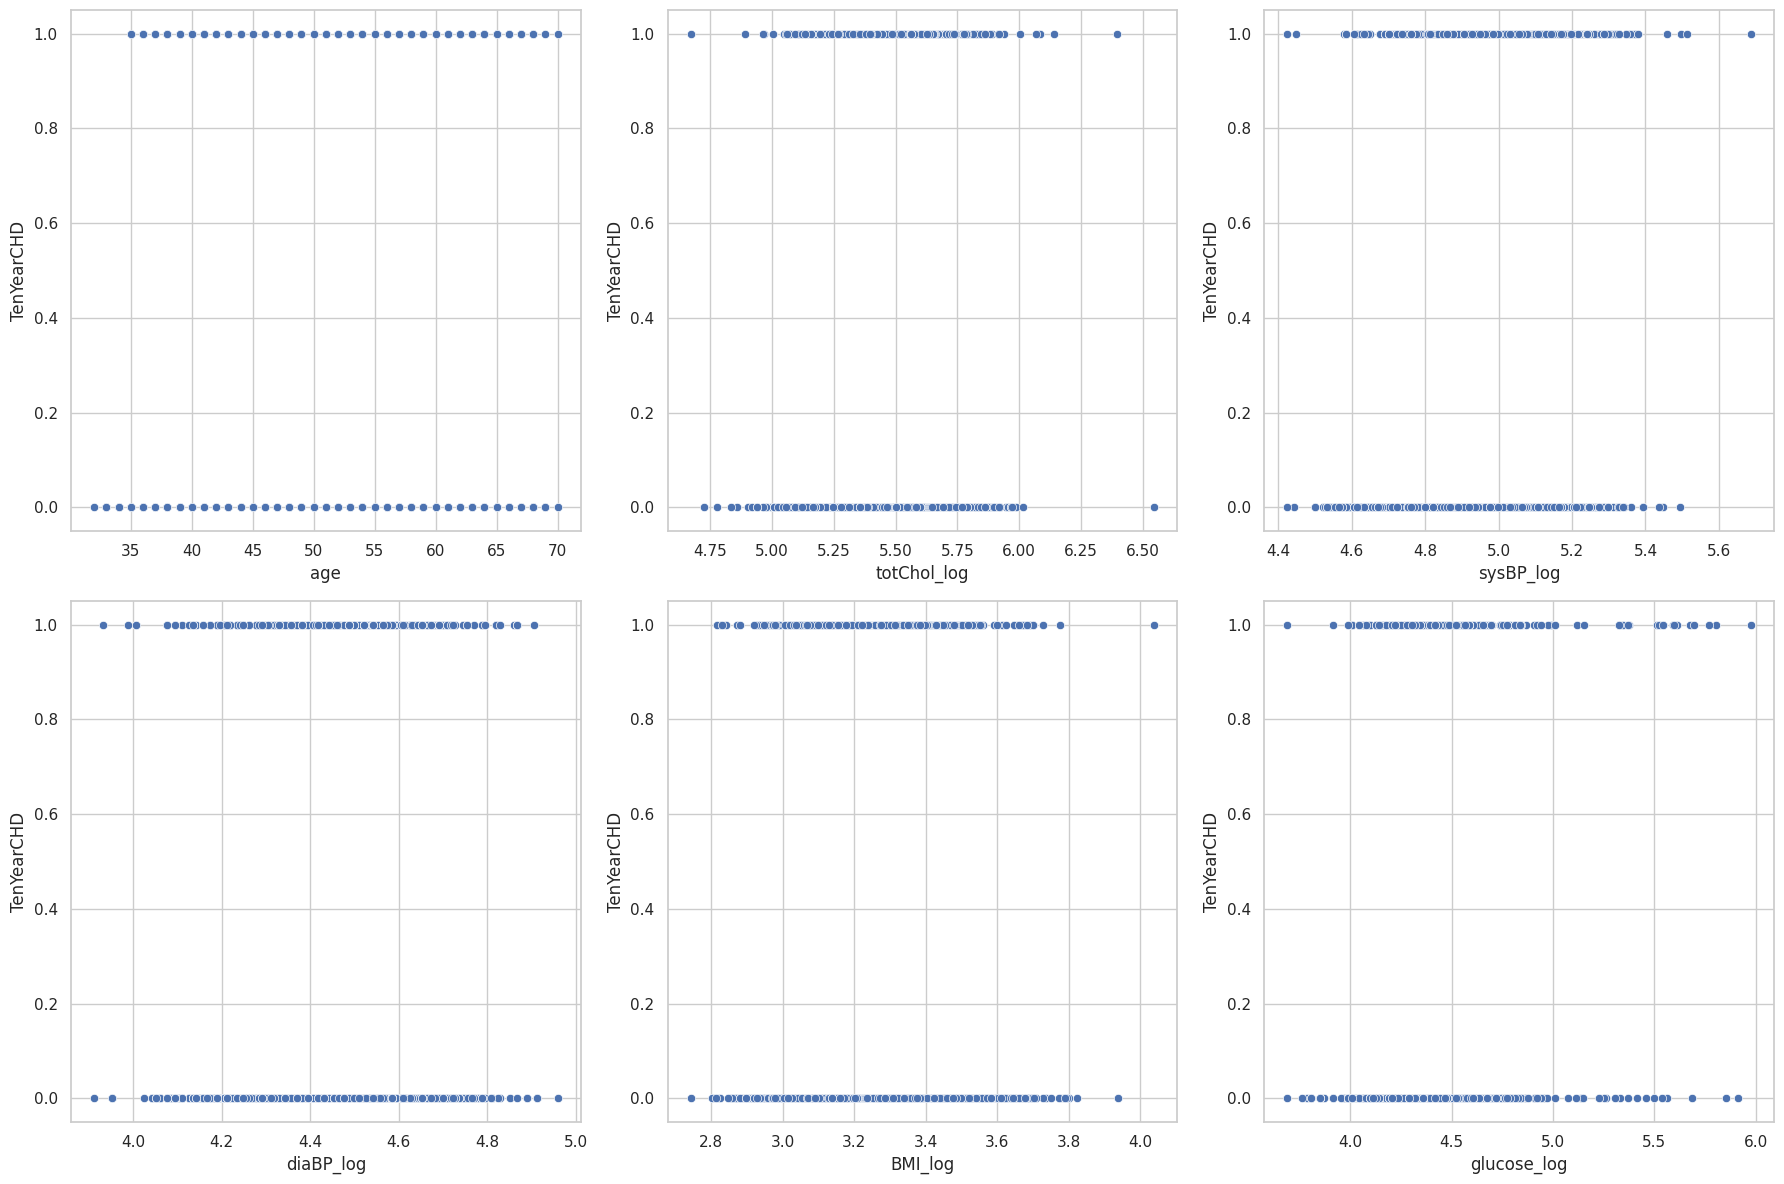

TenYearCHD         1.000000
age                0.225568
sysBP              0.205898
sysBP_log          0.200679
prevalentHyp       0.163910
diaBP              0.133094
diaBP_log          0.126061
glucose            0.123037
diabetes           0.105644
glucose_log        0.105183
totChol            0.099083
sex                0.097138
totChol_log        0.095522
BPMeds             0.086845
BMI                0.071823
BMI_log            0.068584
prevalentStroke    0.062357
cigsPerDay         0.048593
heartRate_log      0.023211
heartRate          0.023205
currentSmoker      0.001644
education         -0.048983
Name: TenYearCHD, dtype: float64

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

sns.scatterplot(data=train_data_cleaned, x='age', y='TenYearCHD', ax=axes[0, 0])
sns.scatterplot(data=train_data_cleaned, x='totChol_log', y='TenYearCHD', ax=axes[0, 1])
sns.scatterplot(data=train_data_cleaned, x='sysBP_log', y='TenYearCHD', ax=axes[0, 2])
sns.scatterplot(data=train_data_cleaned, x='diaBP_log', y='TenYearCHD', ax=axes[1, 0])
sns.scatterplot(data=train_data_cleaned, x='BMI_log', y='TenYearCHD', ax=axes[1, 1])
sns.scatterplot(data=train_data_cleaned, x='glucose_log', y='TenYearCHD', ax=axes[1, 2])

plt.tight_layout()
plt.show()

correlation_matrix = train_data_cleaned.corr()
correlation_matrix['TenYearCHD'].sort_values(ascending=False)

In [ ]:
from sklearn.linear_model import LinearRegression
X = train_data_cleaned.drop('TenYearCHD',axis=1)
y = train_data_cleaned['TenYearCHD']
X_test = test_data_cleaned.drop('TenYearCHD',axis=1)
y_test = test_data_cleaned['TenYearCHD']

model = LinearRegression()
reg = model.fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_test, y_test)) # R squared measure

R-squared:  0.09782510281204049


put results analysis for linear regression here

# **Conclusion**

The purpose of this project was to build models that predict the likelihood a person develops coronary heart disease using data from the Framingham Heart Study. Our approach to tackling this problem was to test various models with subsets of the features provided in the data and see which one performed the best. The three models that were tested were K-Nearest Neighbors, Decision Tree, and Linear Regression, preceded by kMeans clustering. Based on the R-squared, it seems as if the Decision Tree performed the best.

The kMeans clustering helped identify possible predictors for CHD by clustering related data points based on lifestyle and vital health indicators. This model served as a preliminary exploration to guide further analyses. The kNN model, which focused extensively on managing missing data and standardizing features, reported an R² score of 0.0601. This score indicates a relatively modest explanatory power, highlighting the complexity of CHD risk factors and suggesting that other unexamined factors may play significant roles.

The Decision Tree approach, which achieved an R² of 0.83, pointed to a promising predictive performance. However, the notably low ROC AUC of 50% raised concerns about the model's ability to distinguish between the classes effectively, indicating a potential overfit to the training data or a need for a more nuanced metric evaluation approach.

Linear Regression, employed to assess the impact of various predictors such as age, blood pressure, and cholesterol levels on CHD risk, showed that while some predictors were statistically significant, the overall variance explained by the model was limited (9.78%). This outcome further stresses the complexity of cardiovascular disease dynamics and the potential for additional, unexplored variables to contribute to the risk assessment.

Possible criticisms include the inconsistency with the features used for the models. Although it is true, even using the same features will most likely lead to the same conclusion of which model performed the best. The R-squared values of the Linear Regression model and K-Nearest Neighbors model are very different from that of the Decision Tree. Another criticism could be that more models could be used for this task; however, this project was constrained to only a couple of models.

To enhance future studies, we recommend integrating more sophisticated machine learning techniques, such as ensemble methods or neural networks, which may capture complex interactions between variables more effectively. Including additional demographic and genetic factors could also provide deeper insights into the risk factors associated with CHD. Furthermore, adopting a unified feature selection approach could streamline the analysis and provide more consistent results across different models.

In conclusion, this study underscores the intricate nature of predicting CHD and illustrates the value of using multiple analytical approaches to gain comprehensive insights. While the models used did provide valuable findings, they also highlighted the need for ongoing research to refine predictive accuracy and understand the multifaceted nature of heart disease risk.
